# Complains Dashboard

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading csv file to com variable by pandas
com= pd.read_csv("../../dataset/complaints.csv")

In [3]:
com

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,Web,10-05-2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903978,04-10-2017,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company has responded to the consumer and the ...,Referral,04-11-2017,Closed with explanation,Yes,No,2428130
903979,02-07-2017,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I had an account with XXXX in XX/XX/XXXX this ...,Company believes it acted appropriately as aut...,Web,02-07-2017,Closed,Yes,No,2331270
903980,01-04-2017,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,I was contacted on XX/XX/XXXX email by XXXX fr...,NaN,Web,01-04-2017,Closed with explanation,Yes,No,2274241
903981,9/28/2015,Debt collection,Non-federal student loan,Disclosure verification of debt,Not given enough info to verify debt,NaN,Company chooses not to provide a public response,Postal mail,9/30/2015,Closed with explanation,Yes,No,1582525


In [4]:
# get shape of dataset
com.shape

(903983, 13)

In [5]:
# getting number of null in each column
com.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              135408
Complaint ID                         0
dtype: int64

In [6]:
com.Product.value_counts(dropna=False)

Mortgage                                                                        242194
Debt collection                                                                 171567
Credit reporting                                                                140424
Credit card                                                                      89190
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     59186
Student loan                                                                     38612
Consumer Loan                                                                    31608
Credit card or prepaid card                                                      11921
Checking or savings account                                                       9947
Payday loan                                                                       5546
Money transfers                            

In [7]:
com["Submitted via"].value_counts(dropna=False)

Web            634850
Referral       142931
Phone           58505
Postal mail     55066
Fax             12277
Email             354
Name: Submitted via, dtype: int64

In [8]:
com["Sub-product"].value_counts(dropna=False)

NaN                                       235160
Other mortgage                             86633
Conventional fixed mortgage                70617
Checking account                           66499
Credit reporting                           57906
                                           ...  
Traveler's check or cashier's check           63
Check cashing service                         51
Gift card                                     51
Transit card                                  37
Electronic Benefit Transfer / EBT card        12
Name: Sub-product, Length: 76, dtype: int64

In [9]:
com["Product"].unique()

array(['Mortgage', 'Credit reporting', 'Consumer Loan', 'Credit card',
       'Debt collection', 'Student loan', 'Bank account or service',
       'Other financial service', 'Prepaid card', 'Money transfers',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Virtual currency'],
      dtype=object)

## Data Preprocessing

In [10]:
com["Timely response?"] = com["Timely response?"].replace({'Yes':1, 'No':0})

In [11]:
com["Consumer disputed?"] = com["Consumer disputed?"].replace({'Yes':1, 'No':0})

In [12]:
com['Date received'] = pd.to_datetime(com['Date received'], format='%d%m%Y',errors='ignore')

In [23]:
com.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Referral,3/17/2014,Closed with explanation,1,0.0,759217
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,Web,10-05-2016,Closed with explanation,1,0.0,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,Web,10/20/2016,Closed with explanation,1,0.0,2163100
3,06-08-2014,Credit card or prepaid card,NaN,Bankruptcy,NaN,NaN,NaN,Web,06-10-2014,Closed with explanation,1,1.0,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,Web,9/13/2014,Closed with explanation,1,1.0,1027760


In [14]:
com.describe()

,Timely response?,Consumer disputed?,Complaint ID
count,903983.000000,768575.000000,9.039830e+05
mean,0.972779,0.193056,1.492245e+06
std,0.162726,0.394697,8.135767e+05
min,0.000000,0.000000,1.000000e+00
25%,1.000000,0.000000,7.982190e+05
50%,1.000000,0.000000,1.553606e+06
75%,1.000000,0.000000,2.222202e+06
max,1.000000,1.000000,2.730164e+06


In [15]:
com.Product.value_counts()

Mortgage                                                                        242194
Debt collection                                                                 171567
Credit reporting                                                                140424
Credit card                                                                      89190
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     59186
Student loan                                                                     38612
Consumer Loan                                                                    31608
Credit card or prepaid card                                                      11921
Checking or savings account                                                       9947
Payday loan                                                                       5546
Money transfers                            

In [16]:
# As we can see here is too many items in this column and we will merge the catagories
com.Product[com.Product == 'Money transfer, virtual currency, or money service']= 'Money transfers'
com.Product[com.Product == 'Virtual currency']= 'Money transfers'

com.Product[com.Product == 'Prepaid card']= 'Credit card or prepaid card'
com.Product[com.Product == 'Credit card']= 'Credit card or prepaid card'
com.Product[com.Product == 'Payday loan']= 'Payday loan, title loan, or personal loan'
com.Product[com.Product == 'Credit reporting, credit repair services, or other personal consumer reports']= 'Credit reporting'

<ipython-input-16-5973e170e9c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.Product[com.Product == 'Money transfer, virtual currency, or money service']= 'Money transfers'
<ipython-input-16-5973e170e9c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.Product[com.Product == 'Virtual currency']= 'Money transfers'
<ipython-input-16-5973e170e9c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.Product[com.Product == 'Pr

In [17]:
# So we can see that we have divided products to some usefull catagories
com.Product.value_counts()

Mortgage                                     242194
Credit reporting                             199610
Debt collection                              171567
Credit card or prepaid card                  104930
Bank account or service                       86207
Student loan                                  38612
Consumer Loan                                 31608
Checking or savings account                    9947
Payday loan, title loan, or personal loan      7791
Money transfers                                7585
Vehicle loan or lease                          2873
Other financial service                        1059
Name: Product, dtype: int64

In [27]:
# tame taken to respond
com['Date sent to company'] = pd.to_datetime(com['Date sent to company'])
com['Date received'] = pd.to_datetime(com['Date received'])
com.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-03-12,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Referral,2014-03-17,Closed with explanation,1,0.0,759217
1,2016-10-01,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,Web,2016-10-05,Closed with explanation,1,0.0,2141773
2,2016-10-17,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,Web,2016-10-20,Closed with explanation,1,0.0,2163100
3,2014-06-08,Credit card or prepaid card,NaN,Bankruptcy,NaN,NaN,NaN,Web,2014-06-10,Closed with explanation,1,1.0,885638
4,2014-09-13,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,Web,2014-09-13,Closed with explanation,1,1.0,1027760


## Graphs

In [46]:
sub_wise = com["Submitted via"].value_counts(dropna=False, sort=True, ascending=True)
sub_wise

Email             354
Fax             12277
Postal mail     55066
Phone           58505
Referral       142931
Web            634850
Name: Submitted via, dtype: int64

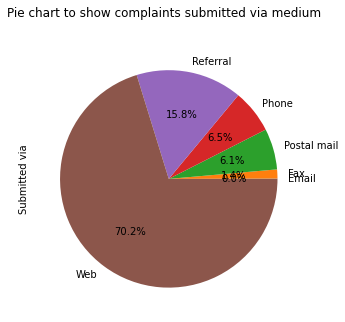

In [47]:
sub_wise.plot(kind='pie',subplots=True, figsize=(5,5),title='Pie chart to show complaints submitted via medium',autopct='%1.1f%%')
plt.show()

In [48]:
# so the above insight show that the maximum complaints are registered via web medium

In [49]:
cat_wise = com["Product"].value_counts(dropna=False, sort=True, ascending=True)
sub_wise

Email             354
Fax             12277
Postal mail     55066
Phone           58505
Referral       142931
Web            634850
Name: Submitted via, dtype: int64

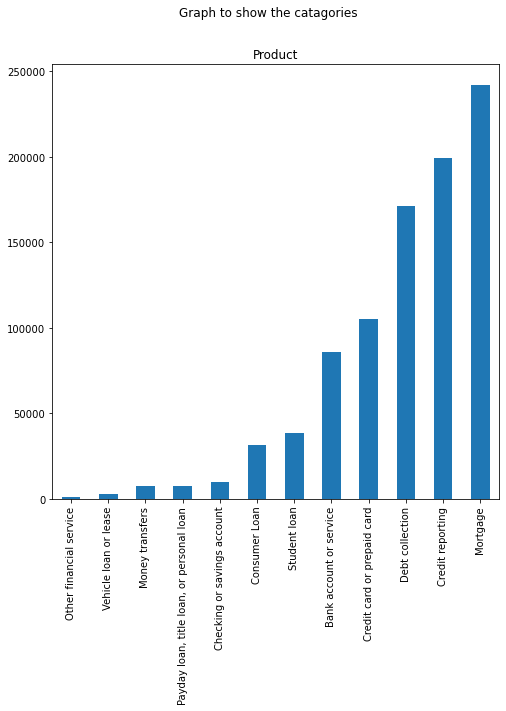

In [50]:
cat_wise.plot(kind='bar',subplots=True, figsize=(8,8),title='Graph to show the catagories')
plt.show()

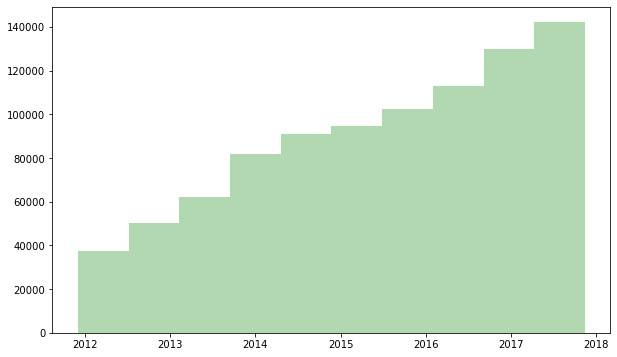

In [61]:
# no of complains registered with time
fig,axs= plt.subplots(1,1,figsize=(10.0,6.0))
axs.hist(com['Date received'], color='green',alpha=0.3,histtype='stepfilled')
plt.show()